In [8]:
import geopandas as gp 
import numpy as np 
import pylab as pl 

In [82]:
n = gp.read_file('../maps/merged_BurnLines_20230912.shp')

In [83]:
n['log_area'] = n['DivDASqKm'].apply(lambda x: np.log(x))
n['depth'] = (n['log_area']+10)*2
n.loc[np.isinf(n['depth']), 'depth'] = 0.98

In [77]:
(np.log(1448)+10)*2

34.55587714589132

In [84]:
n.to_file('../maps/merged_BurnLines_20230912.shp')

<AxesSubplot: >

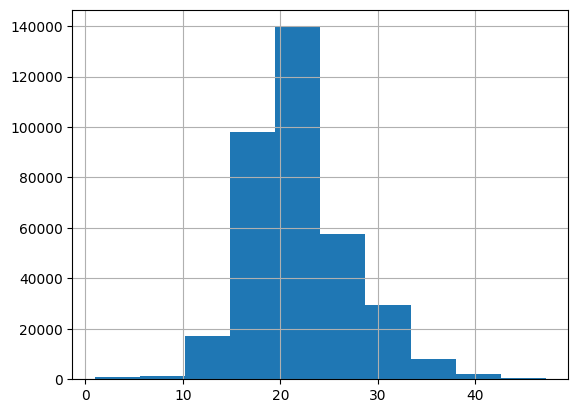

In [75]:
n.depth.hist()

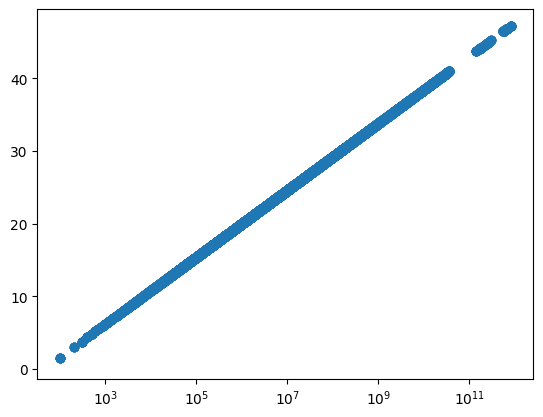

In [81]:
pl.scatter(n.DivDASqKm*1e6, n.depth)
pl.xscale('log')

(array([1.26000e+02, 1.47200e+03, 2.00700e+04, 1.09394e+05, 1.30068e+05,
        5.43450e+04, 2.81760e+04, 7.41400e+03, 1.98700e+03, 4.85000e+02]),
 array([ 1.57931926,  6.1435752 , 10.70783114, 15.27208708, 19.83634302,
        24.40059897, 28.96485491, 33.52911085, 38.09336679, 42.65762273,
        47.22187867]),
 <BarContainer object of 10 artists>)

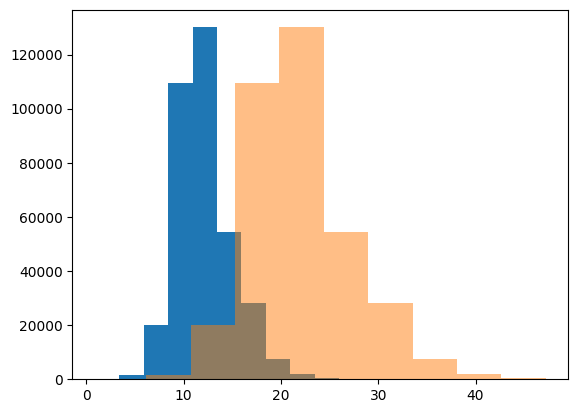

In [74]:
a = n['log_area']
b = a[np.isfinite(a)]+10
pl.hist(b*1.1)
pl.hist(b*2, alpha = 0.5)

We can use the log of the upstream area to burn the DEM and the to avoid negative values we add a 10m and finally we amplify the histogram multiplying by a constnat in this case 1.25